In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from config import *
from models import Generator, Discriminator, GRelu, JRelu
from torch_datasets import (small_ds, small_dl, sketch_ds, sketch_dl,
                            photo_ds, photo_dl, celeb_ds, celeb_dl)
from training import train, new_train
from utils import (show_batch, show_img, show_samples, plot_losses, 
                   render_samples, sorted_paths)

## Experiment: change D leak to .05

In [12]:
g = Generator().to(device)
d = Discriminator(act=GRelu(leak=.05)).to(device)

output = train(300, photo_dl, sample_freq=10, sample_dir='photo_samples2', 
               d=d, g=g)

Epoch [1/300] 
Batch 202 Metrics:
D loss (real): 0.4821	D loss (fake): 0.0001
G loss: 11.9797

Epoch [16/300] 
Batch 202 Metrics:
D loss (real): 0.0247	D loss (fake): 0.3350
G loss: 7.1250

Epoch [31/300] 
Batch 202 Metrics:
D loss (real): 0.0142	D loss (fake): 2.3343
G loss: 8.5377

Epoch [46/300] 
Batch 202 Metrics:
D loss (real): 0.1855	D loss (fake): 0.2570
G loss: 3.8149

Epoch [61/300] 
Batch 202 Metrics:
D loss (real): 0.3091	D loss (fake): 0.0319
G loss: 3.1188

Epoch [76/300] 
Batch 202 Metrics:
D loss (real): 0.0357	D loss (fake): 0.0787
G loss: 4.5330

Epoch [91/300] 
Batch 202 Metrics:
D loss (real): 0.0253	D loss (fake): 0.0072
G loss: 6.6409

Epoch [106/300] 
Batch 202 Metrics:
D loss (real): 0.0015	D loss (fake): 0.5767
G loss: 7.9326

Epoch [121/300] 
Batch 202 Metrics:
D loss (real): 0.0071	D loss (fake): 0.0712
G loss: 7.0096

Epoch [136/300] 
Batch 202 Metrics:
D loss (real): 0.0024	D loss (fake): 0.0101
G loss: 7.4320

Epoch [151/300] 
Batch 202 Metrics:
D loss (rea

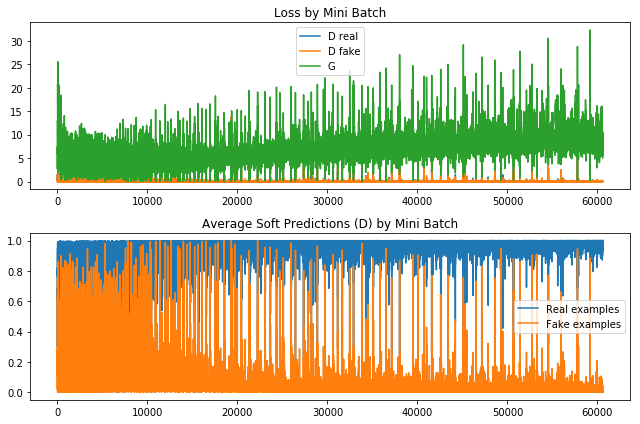

In [13]:
plot_losses(output)

MovieWriter imagemagick unavailable.


Writing file to photos.gif


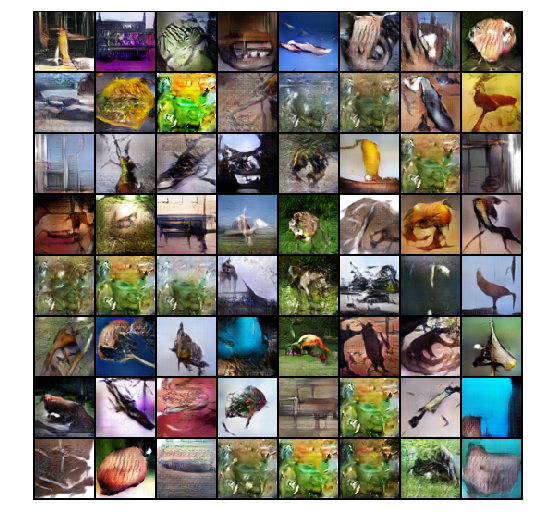

In [29]:
render_samples('photo_samples2', 'photos.gif')

## Experiment: ReLU variant
Found by Jeremy Howard to better preserve mean and variance throughout the model.

In [4]:
g = Generator(act=JRelu).to(device)
d = Discriminator(act=JRelu).to(device)

output = train(200, photo_dl, sample_freq=10, sample_dir='photo_samples3', 
               d=d, g=g)

MovieWriter imagemagick unavailable.


Writing file to photos3.gif


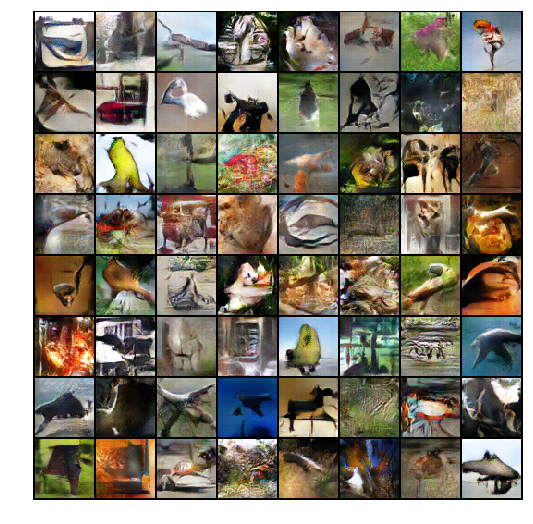

In [30]:
render_samples('photo_samples3', 'photos3.gif')

## Small dataset - G leak of 0.02

In [7]:
g = Generator(act=GRelu(.02)).to(device)
d = Discriminator().to(device)

output = train(1_000, small_dl, sample_freq=50, sample_dir='small_samples2', 
               d=d, g=g)

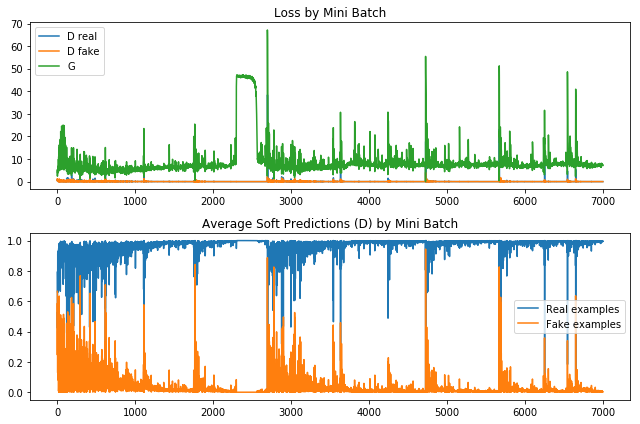

In [14]:
plot_losses(output)

MovieWriter imagemagick unavailable.


Writing file to small_samples.gif


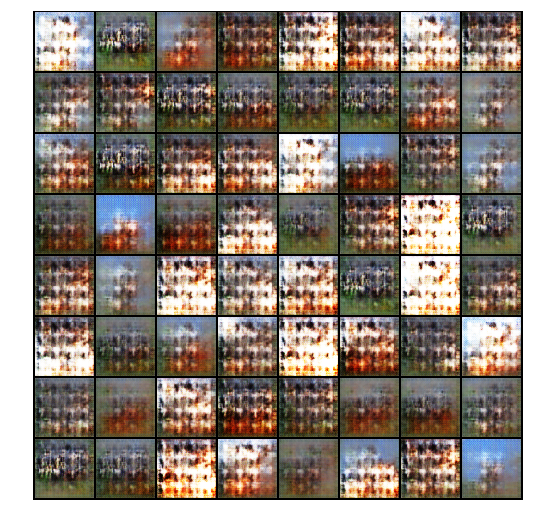

In [28]:
render_samples('small_samples2', 'small_samples.gif')

## Celeb Dataset

In [15]:
epochs = 5
g = Generator(act=GRelu(.2)).to(device)
d = Discriminator().to(device)

output = train(epochs, celeb_dl, sample_freq=1, sample_dir='celeb_samples', 
               d=d, g=g)

Epoch [1/5] 
Batch 3166 Metrics:
D loss (real): 0.1991	D loss (fake): 0.1740
G loss: 2.8866

Epoch [2/5] 
Batch 3166 Metrics:
D loss (real): 0.3050	D loss (fake): 0.0947
G loss: 1.6064

Epoch [3/5] 
Batch 3166 Metrics:
D loss (real): 0.2662	D loss (fake): 0.0972
G loss: 2.6616

Epoch [4/5] 
Batch 3166 Metrics:
D loss (real): 0.2998	D loss (fake): 0.0336
G loss: 3.7226

Epoch [5/5] 
Batch 3166 Metrics:
D loss (real): 0.1672	D loss (fake): 0.0810
G loss: 3.7245



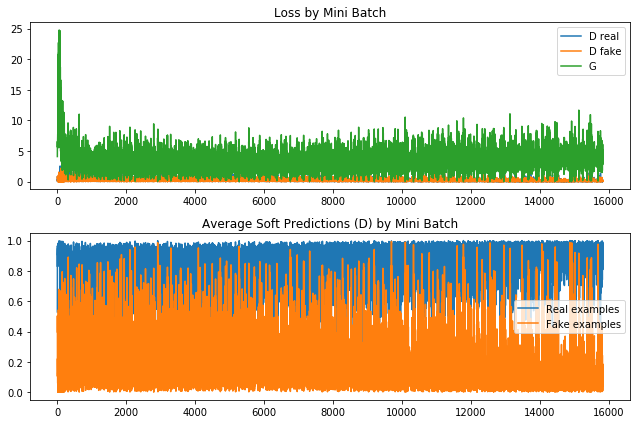

In [17]:
plot_losses(output)

MovieWriter imagemagick unavailable.


Writing file to celeb_samples.gif


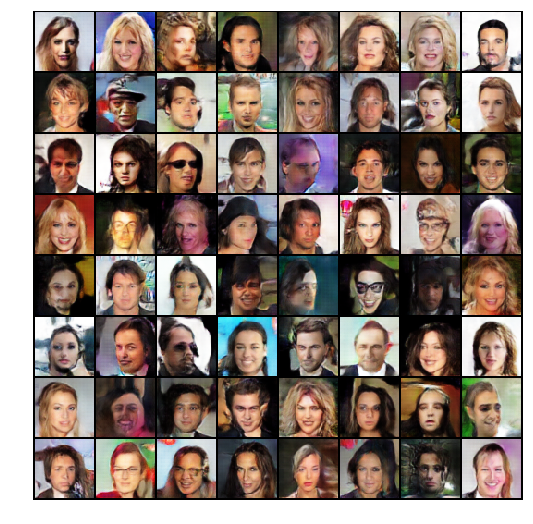

In [18]:
render_samples('celeb_samples', 'celeb_samples.gif')

In [56]:
epochs = 5
g = Generator(act=JRelu).to(device)
d = Discriminator(act=JRelu).to(device)

output = new_train(epochs, celeb_dl, sample_freq=1, 
                   sample_dir='celeb_samples2', d=d, g=g, d_head_start=3,
                   gd_ratio=2)


Epoch [1/5] 
Batch 3166 Metrics:
G loss: 0.9817

Epoch [2/5] 
Batch 3166 Metrics:
G loss: 0.9768

Epoch [3/5] 
Batch 3166 Metrics:
G loss: 0.9584

Epoch [4/5] 
Batch 3166 Metrics:
G loss: 0.7616

Epoch [5/5] 
Batch 3166 Metrics:
G loss: 1.1515


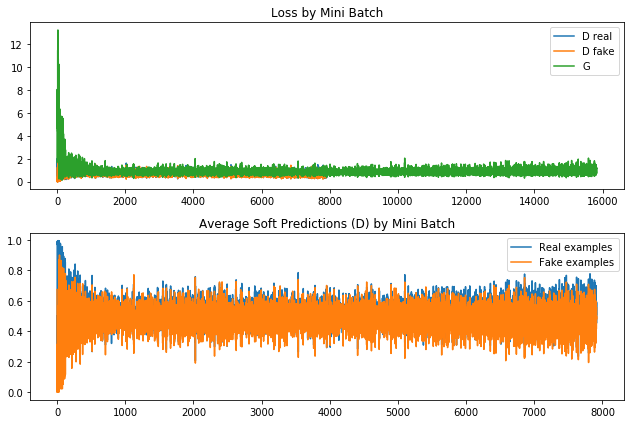

In [57]:
plot_losses(output)

MovieWriter imagemagick unavailable.


Writing file to celeb_samples2.gif


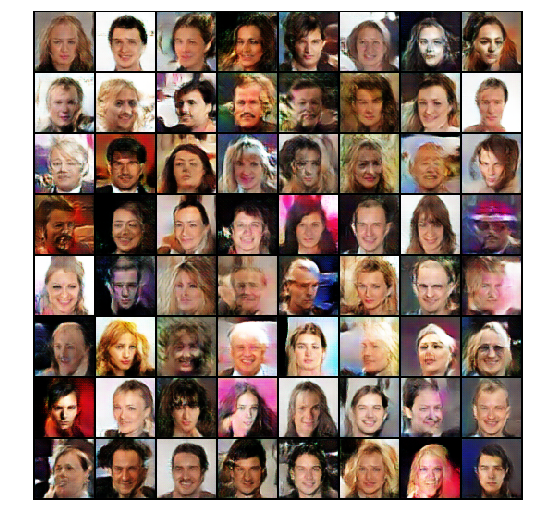

In [58]:
render_samples('celeb_samples2', 'celeb_samples2.gif')

## Sketch Dataset - Increase Leak

In [16]:
epochs = 50
g = Generator(act=GRelu(.2)).to(device)
d = Discriminator().to(device)

output = train(epochs, sketch_dl, sample_freq=10, 
               sample_dir='sketch_samples2', d=d, g=g)

MovieWriter imagemagick unavailable.


Writing file to sketch_samples2.gif


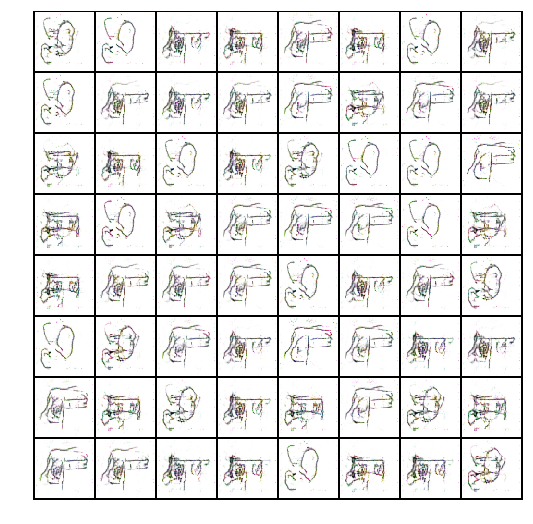

In [7]:
render_samples('sketch_samples2', 'sketch_samples2.gif')

In [59]:
epochs = 30
g = Generator(act=GRelu(.2)).to(device)
d = Discriminator().to(device)

output = new_train(epochs, sketch_dl, sample_freq=2, 
                   sample_dir='sketch_samples3', d=d, g=g, d_head_start=2,
                   gd_ratio=2)


Epoch [1/30] 
Batch 1180 Metrics:
G loss: 1.0901

Epoch [2/30] 
Batch 1180 Metrics:
G loss: 1.6922

Epoch [3/30] 
Batch 1180 Metrics:
G loss: 3.4673

Epoch [4/30] 
Batch 1180 Metrics:
G loss: 5.9918

Epoch [5/30] 
Batch 1180 Metrics:
G loss: 5.1363

Epoch [6/30] 
Batch 1180 Metrics:
G loss: 11.3696

Epoch [7/30] 
Batch 1180 Metrics:
G loss: 5.6310

Epoch [8/30] 
Batch 1180 Metrics:
G loss: 3.7868

Epoch [9/30] 
Batch 1180 Metrics:
G loss: 1.5151

Epoch [10/30] 
Batch 1180 Metrics:
G loss: 4.9256

Epoch [11/30] 
Batch 1180 Metrics:
G loss: 4.0855

Epoch [12/30] 
Batch 1180 Metrics:
G loss: 17.7115

Epoch [13/30] 
Batch 1180 Metrics:
G loss: 4.0901

Epoch [14/30] 
Batch 1180 Metrics:
G loss: 5.9970

Epoch [15/30] 
Batch 1180 Metrics:
G loss: 8.0221

Epoch [16/30] 
Batch 1180 Metrics:
G loss: 13.4355

Epoch [17/30] 
Batch 1180 Metrics:
G loss: 5.8440

Epoch [18/30] 
Batch 1180 Metrics:
G loss: 7.7557

Epoch [19/30] 
Batch 1180 Metrics:
G loss: 7.2045

Epoch [20/30] 
Batch 1180 Metrics:
G

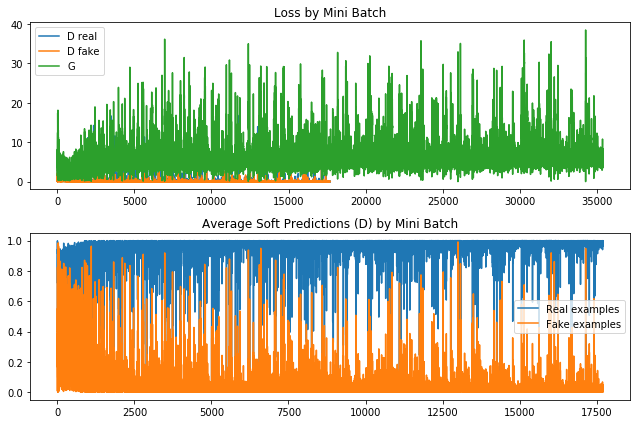

In [60]:
plot_losses(output)

MovieWriter imagemagick unavailable.


Writing file to sketch_samples3.gif


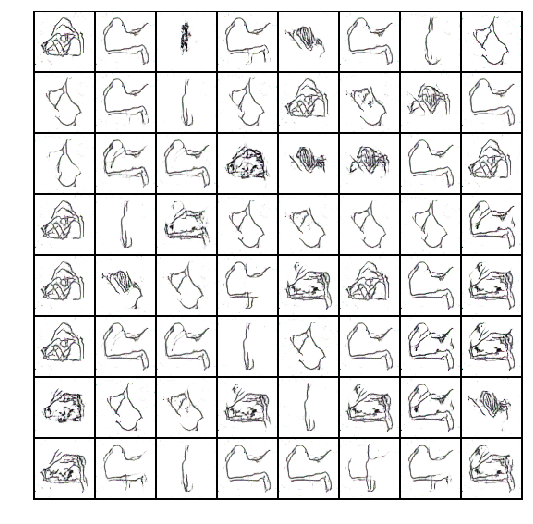

In [61]:
render_samples('sketch_samples3')